In [1]:
from IPython import display
import math
from pprint import pprint
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

In [2]:
import praw

reddit = praw.Reddit(client_id='HIuyPRlQtMIsjQ',
                     client_secret='PTekzmZjerluEHt53qnTQgCyINA',
                     user_agent='spfa8301')

In [3]:
headlines = set()


In [4]:
for submission in reddit.subreddit('SOLO').new(limit=None):
    headlines.add(submission.title)
    display.clear_output()
    print(len(headlines))

22


In [5]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA



In [6]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/Fairbairnsj/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [7]:
sia = SIA()
results = []

for line in headlines:
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)

pprint(results[:3], width=100)

[{'compound': 0.0, 'headline': 'Hostel living tips?', 'neg': 0.0, 'neu': 1.0, 'pos': 0.0},
 {'compound': -0.5574,
  'headline': 'Solo: A Star Wars Story Spoiler Review',
  'neg': 0.419,
  'neu': 0.581,
  'pos': 0.0},
 {'compound': -0.5574,
  'headline': 'Solo: Shit or Hit predictions?',
  'neg': 0.474,
  'neu': 0.526,
  'pos': 0.0}]


In [8]:
df = pd.DataFrame.from_records(results)
df.head()

,compound,headline,neg,neu,pos
0,0.0000,Hostel living tips?,0.000,1.000,0.0
1,-0.5574,Solo: A Star Wars Story Spoiler Review,0.419,0.581,0.0
2,-0.5574,Solo: Shit or Hit predictions?,0.474,0.526,0.0
3,-0.8074,Solo Director Ron Howard Stops By to Give Star...,0.430,0.570,0.0
4,-0.5574,Why did Han Solo flop? No spoilers,0.479,0.521,0.0


In [9]:
df['label'] = 0
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < -0.2, 'label'] = -1
df.head()

,compound,headline,neg,neu,pos,label
0,0.0000,Hostel living tips?,0.000,1.000,0.0,0
1,-0.5574,Solo: A Star Wars Story Spoiler Review,0.419,0.581,0.0,-1
2,-0.5574,Solo: Shit or Hit predictions?,0.474,0.526,0.0,-1
3,-0.8074,Solo Director Ron Howard Stops By to Give Star...,0.430,0.570,0.0,-1
4,-0.5574,Why did Han Solo flop? No spoilers,0.479,0.521,0.0,-1


In [10]:
df2 = df[['headline', 'label']]
df2.to_csv('reddit_headlines_labels.csv', mode='a', encoding='utf-8', index=False)

In [11]:
print("Positive headlines:\n")
pprint(list(df[df['label'] == 1].headline)[:5], width=200)

print("\nNegative headlines:\n")
pprint(list(df[df['label'] == -1].headline)[:5], width=200)

Positive headlines:

['What did I love about Solo!',
 'I just saw Solo... I am overjoyed on the quality of this film! Well done Howard!',
 'I loved Solo, despite having no expectations for it. Here’s my thoughts on it, check it out!']

Negative headlines:

['Solo: A Star Wars Story Spoiler Review',
 'Solo: Shit or Hit predictions?',
 'Solo Director Ron Howard Stops By to Give Star Wars the Arrested Development Treatment',
 'Why did Han Solo flop? No spoilers',
 'SOLO A Star Wars Story Review (non spoiler)']


In [12]:
print(df.label.value_counts())

print(df.label.value_counts(normalize=True) * 100)

-1    10
 0     9
 1     3
Name: label, dtype: int64
-1    45.454545
 0    40.909091
 1    13.636364
Name: label, dtype: float64


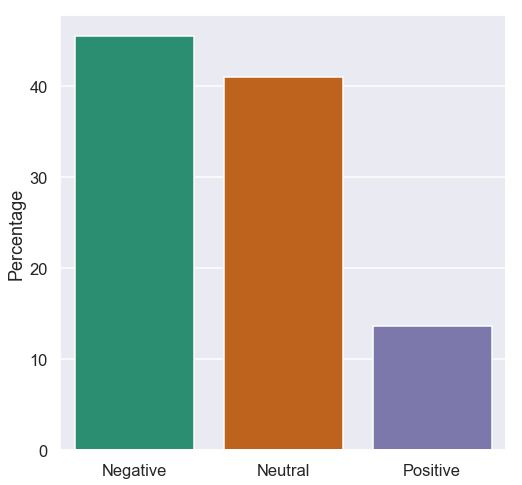

In [13]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = df.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()

In [14]:
from nltk.tokenize import word_tokenize, RegexpTokenizer

example = "This is an example sentence! However, it isn't a very informative one"

print(word_tokenize(example, language='english'))

['This', 'is', 'an', 'example', 'sentence', '!', 'However', ',', 'it', 'is', "n't", 'a', 'very', 'informative', 'one']


In [15]:
tokenizer = RegexpTokenizer(r'\w+')
tokenizer.tokenize(example)

['This',
 'is',
 'an',
 'example',
 'sentence',
 'However',
 'it',
 'isn',
 't',
 'a',
 'very',
 'informative',
 'one']

In [16]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
print(stop_words[:20])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


In [17]:
def process_text(headlines):
    tokens = []
    for line in headlines:
        toks = tokenizer.tokenize(line)
        toks = [t.lower() for t in toks if t.lower() not in stop_words]
        tokens.extend(toks)
    
    return tokens

In [18]:
pos_lines = list(df[df.label == 1].headline)

pos_tokens = process_text(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)

pos_freq.most_common(20)

[('solo', 3),
 ('love', 1),
 ('saw', 1),
 ('overjoyed', 1),
 ('quality', 1),
 ('film', 1),
 ('well', 1),
 ('done', 1),
 ('howard', 1),
 ('loved', 1),
 ('despite', 1),
 ('expectations', 1),
 ('thoughts', 1),
 ('check', 1)]

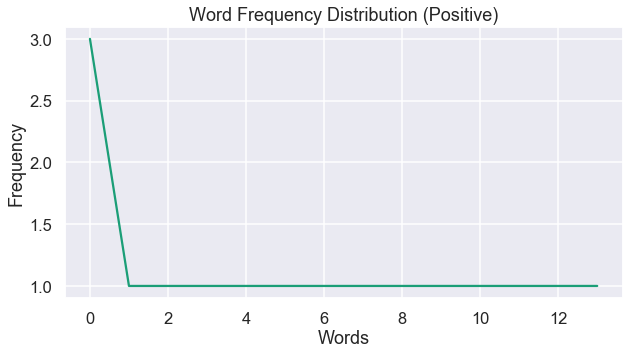

In [19]:
y_val = [x[1] for x in pos_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Positive)")
plt.show()

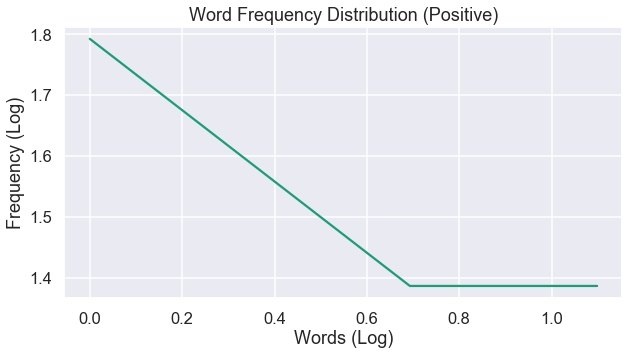

In [20]:
y_final = []
for i, k, z, t in zip(y_val[0::4], y_val[1::4], y_val[2::4], y_val[3::4]):
    y_final.append(math.log(i + k + z + t))

x_val = [math.log(i + 1) for i in range(len(y_final))]

fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Positive)")
plt.plot(x_val, y_final)
plt.show()

In [21]:
neg_lines = list(df2[df2.label == -1].headline)

neg_tokens = process_text(neg_lines)
neg_freq = nltk.FreqDist(neg_tokens)

neg_freq.most_common(20)

[('solo', 9),
 ('star', 7),
 ('wars', 7),
 ('story', 5),
 ('review', 3),
 ('spoiler', 2),
 ('ron', 2),
 ('howard', 2),
 ('shit', 1),
 ('hit', 1),
 ('predictions', 1),
 ('director', 1),
 ('stops', 1),
 ('give', 1),
 ('arrested', 1),
 ('development', 1),
 ('treatment', 1),
 ('han', 1),
 ('flop', 1),
 ('spoilers', 1)]

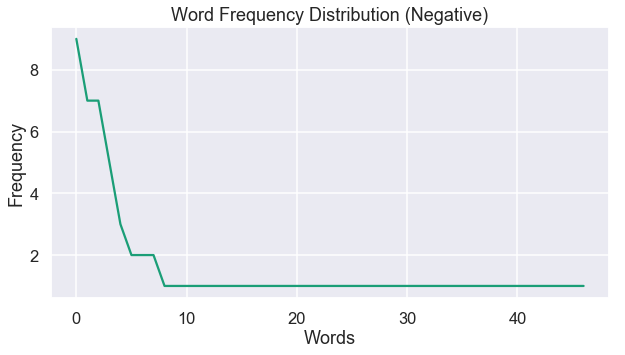

In [22]:
y_val = [x[1] for x in neg_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Negative)")
plt.show()

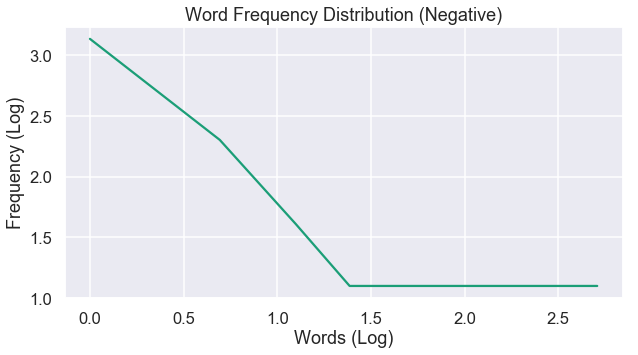

In [23]:
y_final = []
for i, k, z in zip(y_val[0::3], y_val[1::3], y_val[2::3]):
    if i + k + z == 0:
        break
    y_final.append(math.log(i + k + z))

x_val = [math.log(i+1) for i in range(len(y_final))]

fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Negative)")
plt.plot(x_val, y_final)
plt.show()